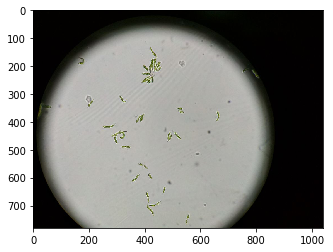

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

im = plt.imread('images/counting_algae_3.jpeg')

plt.imshow(im)

original image shape: (780, 1040, 3)
alpha channel intensity: 101.26 +- 81.82


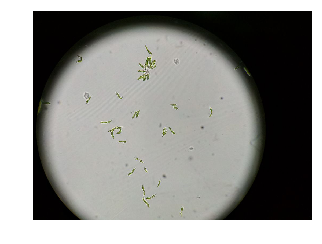

In [2]:
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure(figsize=(5,5))
    plt.imshow(im, interpolation='none', **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')

print ('original image shape: {}'.format(im.shape))
print ('alpha channel intensity: {0:.2f} +- {1:.2f}'.format(np.mean(im[:,:,-1]), np.std(im[:,:,-1]))
)
my_imshow(im)

grayscale image shape: (780, 1040)


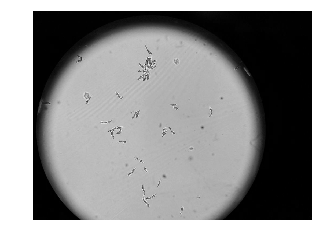

In [3]:
from skimage import color

# convert to gray 
gray_im = color.rgb2gray(im)
print ('grayscale image shape:', gray_im.shape)

my_imshow(gray_im)

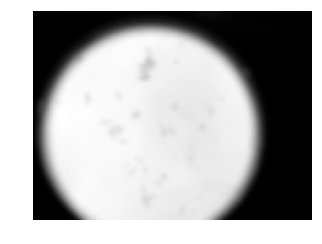

In [4]:
from skimage import filters
blurred_im = filters.gaussian(gray_im, sigma=10)
my_imshow(blurred_im)

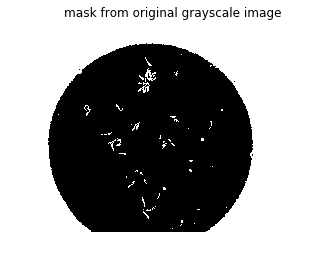

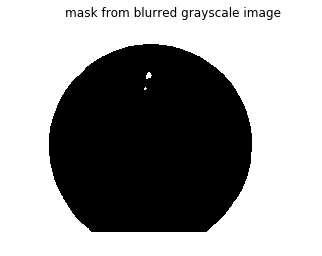

In [5]:
thresh = 0.6
mask = gray_im < thresh
blurred_mask = blurred_im < thresh

my_imshow(mask, title='mask from original grayscale image')
my_imshow(blurred_mask, title='mask from blurred grayscale image')

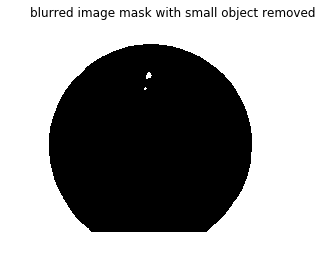

In [6]:
from skimage import morphology

#blurred_mask_clean = morphology.remove_small_objects(blurred_mask, min_size=150)
blurred_mask_clean = blurred_mask


my_imshow(blurred_mask_clean, title='blurred image mask with small object removed')
#my_imshow(blurred_mask ^ blurred_mask_clean, 'removed small objects')

In [7]:
from scipy import ndimage as ndi

#distance_im = ndi.distance_transform_edt(blurred_mask_clean)
distance_im = blurred_mask_clean

# print ('distance transform:', distance_im.shape, distance_im.dtype)

# my_imshow(distance_im, title='distance transform of mask')
# my_imshow(blurred_mask_clean[850:950, 300:400], title='mask showing 2 overlapping cells')
# my_imshow(distance_im[850:950, 300:400], title='distance transform of above')

If we've done everything right, the peaks of the distance transform image represent the centers of each cell (including those that overlap). We label each separate peak with a unique integer with skimage.measure.label.

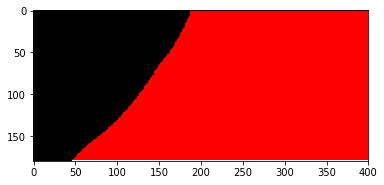

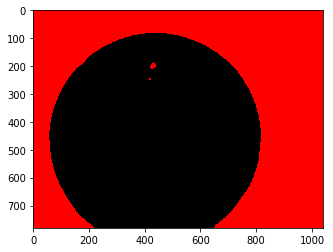

In [8]:
from skimage import feature, measure
from matplotlib.colors import ListedColormap

def imshow_overlay(im, mask, alpha=0.5, color='red', **kwargs):
    """Show semi-transparent red mask over an image"""
    mask = mask > 0
    mask = np.ma.masked_where(~mask, mask)        
    plt.imshow(im, **kwargs)
    plt.imshow(mask, alpha=alpha, cmap=ListedColormap([color]))


peaks_im = feature.peak_local_max(distance_im, indices=False)

plt.figure()
#imshow_overlay(distance_im[850:950, 300:400], peaks_im[850:950, 300:400], alpha=1, cmap='gray')
imshow_overlay(distance_im[600:900, 600:1000], peaks_im[600:900, 600:1000], alpha=1, cmap='gray')
plt.figure()

imshow_overlay(distance_im, peaks_im, alpha=1, cmap='gray')

In [9]:
# import matplotlib
# random_colors = matplotlib.colors.ListedColormap (np.random.rand ( 256,3))


# markers_im = measure.label(peaks_im)
# labelled_cell_im = morphology.watershed(-distance_im, markers_im, mask=blurred_mask_clean)
# num_bacteria = len(np.unique(labelled_cell_im))-1

# my_imshow(labelled_cell_im, 'labelled cells', cmap='jet')
# my_imshow(blurred_mask_clean[850:950, 300:400], 'mask of overlapping cells')
# my_imshow(labelled_cell_im[850:950, 300:400], 'labelled', cmap=random_colors)

# print(num_bacteria)

In [10]:
# my_imshow(im, 'bacteria', cmap='jet')
# plt.figure(figsize=(5,5))
# plt.imshow(im, interpolation='none', cmap='jet')
# plt.title('bacteria')
# plt.axis('off')

# properties = measure.regionprops(labelled_cell_im)
# bacteria_areas = [int(prop.area) for prop in properties]
# bacteria_centroids = [prop.centroid for prop in properties]

# for lab in range(len(bacteria_areas)):
#     plt.text(bacteria_centroids[lab][1]-30,bacteria_centroids[lab][0],bacteria_areas[lab])
    


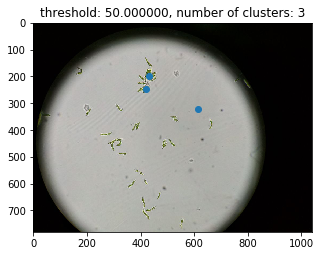

In [11]:
import scipy.cluster.hierarchy as hcluster

# clustering
thresh = 50

markers_im = measure.label(peaks_im)

properties = measure.regionprops(markers_im)
#bacteria_areas = [int(prop.area) for prop in properties]
bacteria_centroids = [prop.centroid for prop in properties]
#bacteria_centroids = feature.peak_local_max(distance_im)

#clusters = hcluster.fclusterdata(bacteria_centroids, thresh, criterion="distance")
#clusters = hcluster.fclusterdata(bacteria_centroids, thresh, metric='euclidean', method='distance')

bac_array = np.asarray(bacteria_centroids)
bac_array[:,0]

#print("threshold: %f, number of clusters: %d" % (thresh, len(set(clusters))))


plt.figure(figsize=(5,5))
plt.imshow(im, interpolation='none', cmap='jet')
# plotting
# plt.scatter(*np.transpose(bacteria_centroids), c=clusters
#plt.scatter(bac_array[:,1], bac_array[:,0], c=clusters, cmap='jet')
plt.scatter(bac_array[:,1], bac_array[:,0], cmap='jet')


# plt.axis("equal")
#title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
title = "threshold: %f, number of clusters: %d" % (thresh, len(bacteria_centroids))

plt.title(title)
plt.show()




In [12]:
from scipy.spatial import distance as dist

dist_mat =  dist.squareform(dist.pdist(bacteria_centroids))
link_mat = hcluster.linkage(dist_mat)
cluster_idx = hcluster.fcluster(link_mat, 300,
                            criterion='distance')

/home/gabiitokazu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [13]:
bacteria_centroids

[(322.6250427908171, 614.9410930914225),
 (198.6759002770083, 430.9058171745152),
 (247.4558823529412, 419.0882352941176)]

In [14]:
import numpy.random as random

np.transpose(random.randn(2,200))


array([[ 3.05078105e+00, -1.11864334e+00],
       [ 6.20298949e-02,  4.29988739e-01],
       [ 1.51176064e-01,  6.19595828e-01],
       [-3.78141237e-02,  9.57947023e-01],
       [ 5.27300194e-01,  1.09532189e+00],
       [ 2.73096214e-01,  1.37388405e+00],
       [ 6.04901914e-01,  2.60136224e-01],
       [-4.98484314e-01, -9.40993832e-01],
       [ 6.03645445e-01,  4.72919738e-01],
       [ 1.28684234e-01,  1.49246143e+00],
       [ 9.31707519e-01,  4.17686660e-01],
       [ 3.24073552e-01, -2.56032393e-01],
       [ 2.00165427e+00,  2.05101647e-01],
       [-1.01782317e+00,  1.15791489e+00],
       [ 1.58221667e+00, -5.42521891e-01],
       [ 2.92576709e-01, -2.79181454e-01],
       [ 3.51087174e-01, -7.55574807e-01],
       [ 5.32676998e-01,  1.42517225e+00],
       [-3.21016340e-01, -5.68531481e-01],
       [-2.02222292e+00,  1.20149447e+00],
       [-1.16371618e-01,  2.04324631e+00],
       [ 1.89785068e+00,  8.67220299e-02],
       [-2.08289824e+00,  1.09991036e-01],
       [-4.